In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
pd.set_option('expand_frame_repr',False)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

In [17]:
train = pd.read_csv(r'C:\Users\lyuli\Desktop\Orie-4741-Project\data\train.csv')
test = pd.read_csv(r'C:\Users\lyuli\Desktop\Orie-4741-Project\data\test.csv')

y = ['ZHVI_next']
train_x = train.loc[:,~train.columns.isin(y)]
train_y = train.loc[:,train.columns.isin(y)]
train_y = np.array(train_y).reshape((len(train_y,)))

test_x = test.loc[:,~test.columns.isin(y)]
test_y = test.loc[:,test.columns.isin(y)]
test_y = np.array(test_y).reshape((len(test_y,)))


In [22]:
model = BaggingRegressor()
n_estimators = [10, 100, 100]
max_samples = [0.05,0.1,0.5]
# define grid search
grid = dict(n_estimators=n_estimators,max_samples = max_samples)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: -83293317.798169 using {'max_samples': 0.5, 'n_estimators': 100}
-144105249.719457 (66146556.494117) with: {'max_samples': 0.05, 'n_estimators': 10}
-133503439.770145 (63547989.301015) with: {'max_samples': 0.05, 'n_estimators': 100}
-134411658.406045 (63081600.700523) with: {'max_samples': 0.05, 'n_estimators': 100}
-127297214.522342 (70017215.608034) with: {'max_samples': 0.1, 'n_estimators': 10}
-113986938.963029 (62651600.656999) with: {'max_samples': 0.1, 'n_estimators': 100}
-113336378.043266 (62944146.434070) with: {'max_samples': 0.1, 'n_estimators': 100}
-91992092.190312 (57799576.232737) with: {'max_samples': 0.5, 'n_estimators': 10}
-83930354.979862 (46291656.791443) with: {'max_samples': 0.5, 'n_estimators': 100}
-83293317.798169 (45795132.636518) with: {'max_samples': 0.5, 'n_estimators': 100}


In [ ]:
# Fit the model again with best set of params from above results
best_n_est = 100
best_max_sample = 0.5
# fit regressor again
model = BaggingRegressor(n_estimators = best_n_est,max_samples = best_max_sample)
model.fit(train_x,train_y)
ypred = model.predict(test_x)

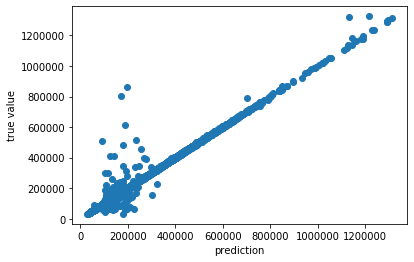

In [25]:

plt.scatter(ypred,test_y)
plt.xlabel('prediction')
plt.ylabel('true value')
plt.show()


In [26]:

mse = sum((test_y-ypred)**2)/len(ypred)
print('MSE for best set of parameters from grid search:',mse)

MSE for best set of parameters from grid search: 120048825.30166616


In [28]:
def trend_accuracy(test_df, pred):
    trend = np.sign(test_df.ZHVI_next - test_df.ZHVI)
    trend_pred = np.sign(pred - test_df.ZHVI)

    return sum(trend == trend_pred)/len(trend)

In [33]:
trend_accuracy(test,ypred)

0.8426044330775788